### Why: The aim of this project is to identify a fraudlent transaction as accurate as possible.

### Step 1: Importing the Relevant Libraries

In [1]:
import  numpy as np
import  pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import feature_selection
from sklearn import model_selection
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [3]:
### Importing data 

In [4]:
df = pd.read_csv(r'C:\Users\pelux\Desktop\CV\Fin Pred.csv')

In [5]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


### Step 2: Data Inspection

In [7]:
df.shape[0]

6362620

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


<Axes: xlabel='amount'>

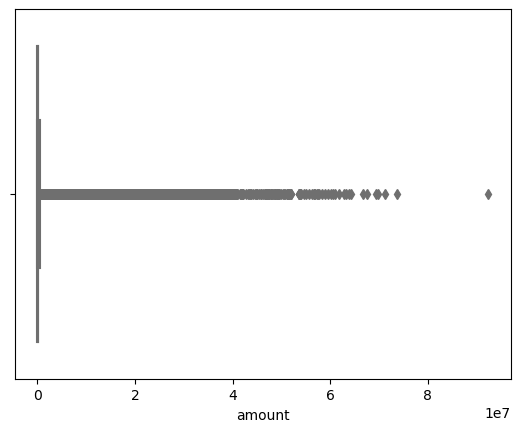

In [9]:
sns.boxplot(x = df['amount'], color='skyblue')

In [10]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [11]:
df.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [12]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [13]:
data = [df]
for dataset in data:
    #Filter categorical variables
    categorical_columns = [x for x in dataset.dtypes.index if dataset.dtypes[x]=='object']
    
for col in categorical_columns:
    print ('\nFrequency of Categories for variable %s'%col)
    print (df[col].value_counts())


Frequency of Categories for variable type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

Frequency of Categories for variable nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: nameOrig, Length: 6353307, dtype: int64

Frequency of Categories for variable nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: nameDest, Length: 2722362, dtype: int64


### Step 3: Exploratory Data Analysis and Data Cleaning

### Visually analysing object data type

<Axes: xlabel='type', ylabel='count'>

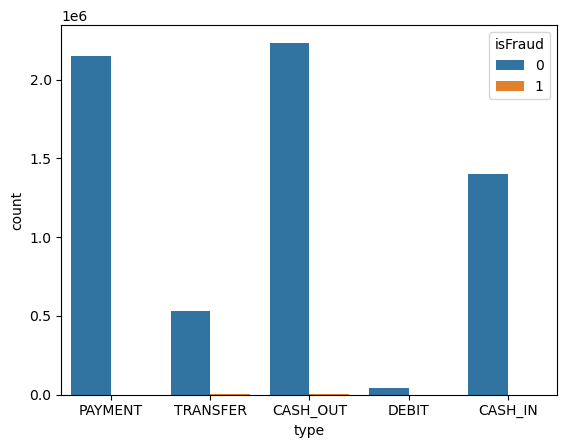

In [14]:
sns.countplot(x=df['type'],hue=df['isFraud'])

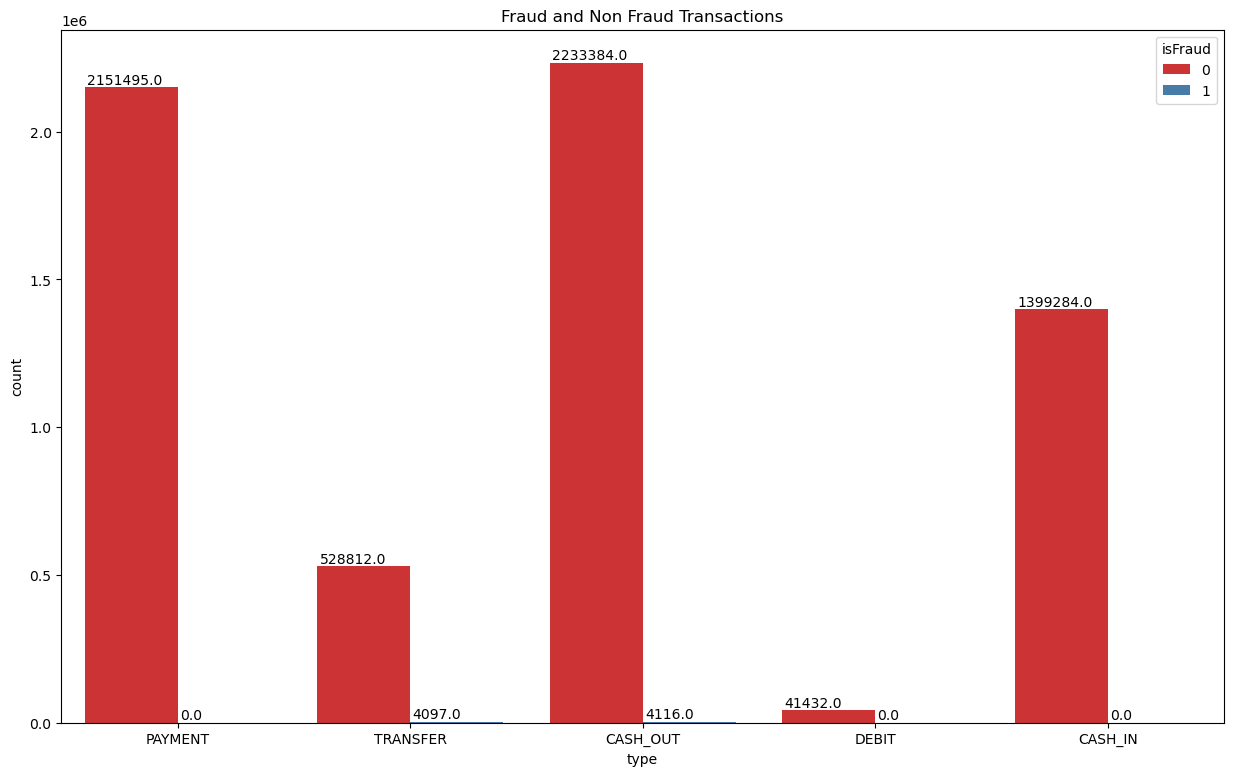

In [15]:
plt.figure(figsize = (15, 9))
ax=sns.countplot(data = df, x = "type", hue="isFraud", palette = 'Set1')
plt.title('Fraud and Non Fraud Transactions')
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.01, p.get_height()+10000))

All the fraud trnasactions belong to Transfer or Cash-out type, so discard data corresponding to other types

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


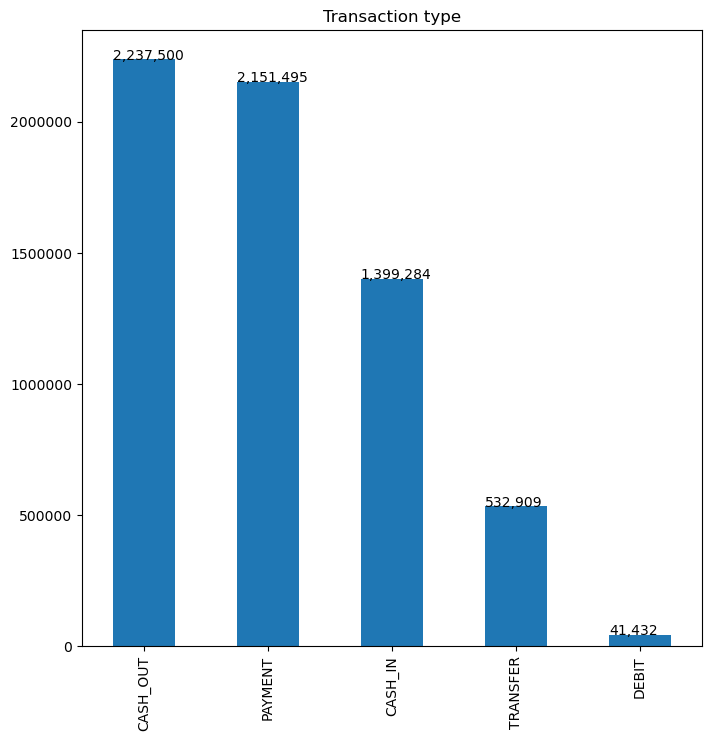

In [16]:
print(df.type.value_counts())
f, ax = plt.subplots(1, 1, figsize=(8, 8))
df.type.value_counts().plot(kind='bar', title="Transaction type", ax=ax, figsize=(8,8))
plt.ticklabel_format(style='plain', axis='y')
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()))
plt.show()

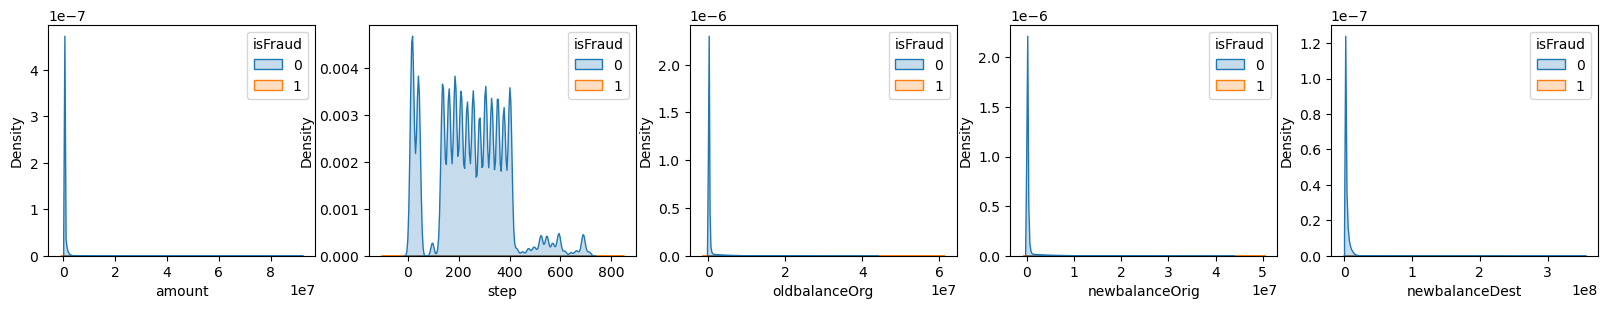

In [17]:
fig,axs=plt.subplots(figsize=(20,3),ncols=5)
sns.kdeplot(x=df['amount'],hue=df['isFraud'],fill=True,ax=axs[0])
sns.kdeplot(x=df['step'],hue=df['isFraud'],fill=True,ax=axs[1])
sns.kdeplot(x=df['oldbalanceOrg'],hue=df['isFraud'],fill=True,ax=axs[2])
sns.kdeplot(x=df['newbalanceOrig'],hue=df['isFraud'],fill=True,ax=axs[3])
sns.kdeplot(x=df['newbalanceDest'],hue=df['isFraud'],fill=True,ax=axs[4])
plt.show()

In [18]:
#print("% of Valid transactions:",round(data.isFraud.value_counts()[0]/data.shape[0] * 100,2))
#print("% of Fraud transactions:",round(data.isFraud.value_counts()[1]/data.shape[0] * 100,2))

print("No of Valid transactions:",df.isFraud.value_counts()[0],'which is ',round(df.isFraud.value_counts()[0]/df.shape[0] * 100,2),'%')
print("No of Fraud transactions:",df.isFraud.value_counts()[1],'which is ',round(df.isFraud.value_counts()[1]/df.shape[0] * 100,2),'%')

df.isFraud.value_counts()

No of Valid transactions: 6354407 which is  99.87 %
No of Fraud transactions: 8213 which is  0.13 %


0    6354407
1       8213
Name: isFraud, dtype: int64

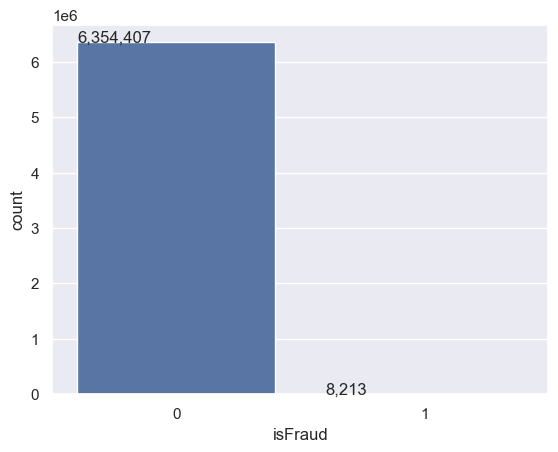

In [19]:
df['isFraud'].value_counts()
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="isFraud", data=df)
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()))

In [14]:
print("No of transactions Flagged as Valid:",df.isFlaggedFraud.value_counts()[0])
print("No of transactions Flagged as Fraud:",df.isFlaggedFraud.value_counts()[1])

No of transactions Flagged as Valid: 6362604
No of transactions Flagged as Fraud: 16


In [15]:
df_Fraud= df[df.isFlaggedFraud==1]
print("How many frauds transactions are Flagged?:")
print("\t",len(df_Fraud))

print("What type of transactions are they?")
print("\t",df_Fraud['type'].value_counts().index[0])

print("Are all these flagged also marked as Fraud Transactions?")
print("\t",df_Fraud['isFraud'].value_counts()[1] == len(df_Fraud))

print("Minumum amount transfered in these transactions")
print("\t",df_Fraud.amount.min())

print("Maximum amount transfered in these transactions")
print("\t",df_Fraud.amount.max())

How many frauds transactions are Flagged?:
	 16
What type of transactions are they?
	 TRANSFER
Are all these flagged also marked as Fraud Transactions?
	 True
Minumum amount transfered in these transactions
	 353874.22
Maximum amount transfered in these transactions
	 10000000.0


In [16]:
print("Are there any mismatch in the balance at origin and destination after transaction?")
df['error_orig'] = (df["oldbalanceOrg"] - df["amount"] != df["newbalanceOrig"]).astype(int)
df['error_dest'] = (df["oldbalanceDest"] + df["amount"] != df["newbalanceDest"]).astype(int)

print("Balance Error(%) at the origin:",round(df['error_orig'].value_counts()[1]/df.shape[0] * 100,2))
print("Balance Error(%) at the destination:",round(df['error_dest'].value_counts()[1]/df.shape[0] * 100,2))

#print("Valid Balance(%) at the origin:",round(df['error_orig'].value_counts()[0]/df.shape[0] * 100,2))
#print("Valid Balance(%) at the dest:",round(df['error_dest'].value_counts()[0]/df.shape[0] * 100,2))

Are there any mismatch in the balance at origin and destination after transaction?
Balance Error(%) at the origin: 85.09
Balance Error(%) at the destination: 74.45


### Since All the fraud trnasactions belong to Transfer or Cash-out type, we discard data corresponding to other types

In [17]:
df = df.loc[(df['type'].isin(['TRANSFER', 'CASH_OUT']))]
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,error_orig,error_dest
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,0,1
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,1,1
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,1,1
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,1,1


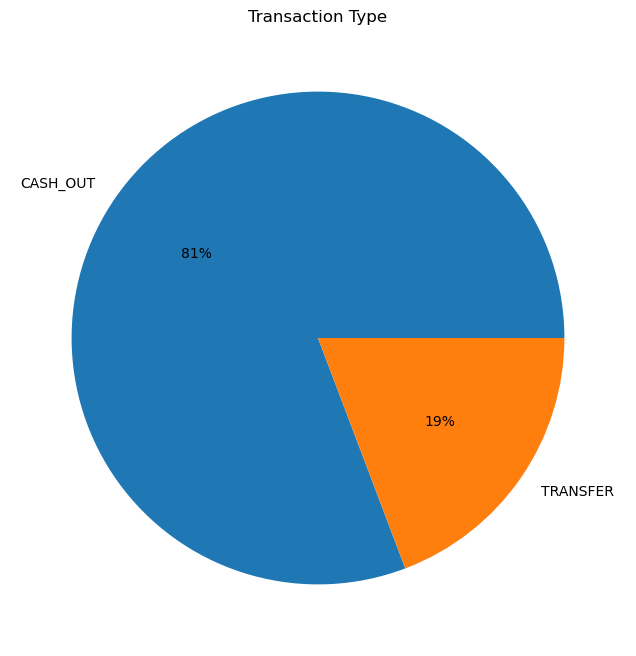

In [18]:
#create pie chart
plt.figure(figsize=(10,8))
plt.pie(df.type.value_counts().values,labels=df.type.value_counts().index,  autopct='%.0f%%')
plt.title("Transaction Type")
plt.show()

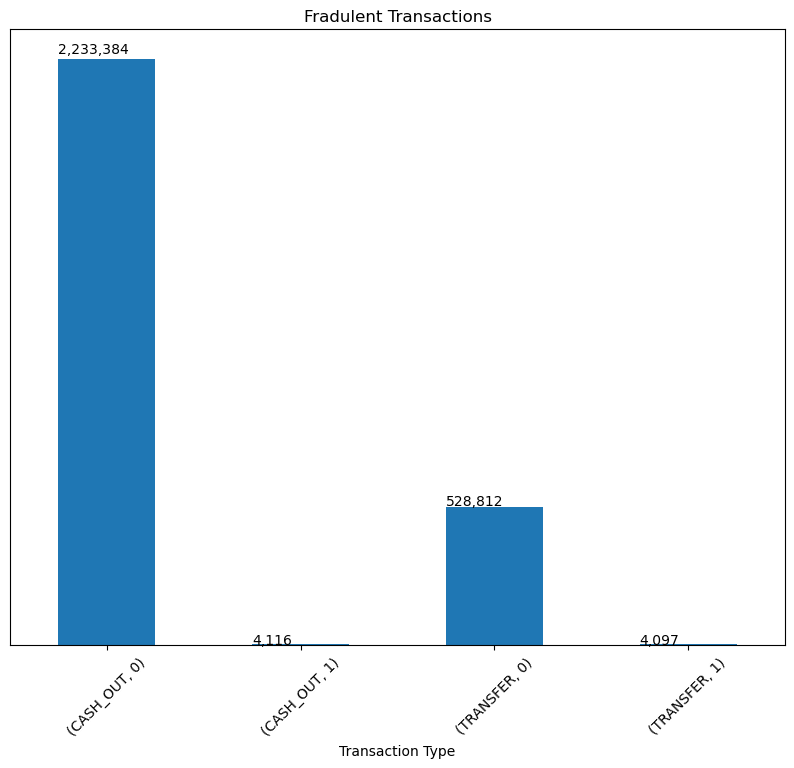

In [19]:
plt.figure(figsize=(10,8))
ax = df.groupby(['type','isFraud']).size().plot(kind='bar')

for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))
plt.title("Fradulent Transactions")
plt.xlabel("Transaction Type")
plt.yticks([])
#plt.xticks([' Valid CashOut','Fraud CashOut','Valid Transfer','Fraud Transfer'])
plt.xticks(rotation=45)
plt.show()

In [20]:
print('All Transactions ',df['nameOrig'].size)
print('Unique Transactions ',df['nameOrig'].unique().size)
print('Transactions from existing accounts ',df['nameOrig'].size-df['nameOrig'].unique().size)

All Transactions  2770409
Unique Transactions  2768630
Transactions from existing accounts  1779


In [21]:
print('All Transactions ',df['nameDest'].size)
print('Unique Transactions ',df['nameDest'].unique().size)
print('Transactions from existing accounts ',df['nameDest'].size-df['nameOrig'].unique().size)


All Transactions  2770409
Unique Transactions  509565
Transactions from existing accounts  1779


In [22]:
print('\nAre there any merchants among originator accounts for CASH_IN \
transactions? {}'.format(\
(df.loc[df.type == 'CASH_IN'].nameOrig.str.contains('M')).any()))


Are there any merchants among originator accounts for CASH_IN transactions? False


In [23]:
print('\nAre there any merchants among destination accounts for CASH_OUT \
transactions? {}'.format(\
(df.loc[df.type == 'CASH_OUT'].nameDest.str.contains('M')).any()))


Are there any merchants among destination accounts for CASH_OUT transactions? False


In [24]:
print('\nAre there merchants among any originator accounts? {}'.format(\
      df.nameOrig.str.contains('M').any())) 

print('\nAre there any transactions having merchants among destination accounts\
 other than the PAYMENT type? {}'.format(\
(df.loc[df.nameDest.str.contains('M')].type != 'PAYMENT').any()))


Are there merchants among any originator accounts? False

Are there any transactions having merchants among destination accounts other than the PAYMENT type? False


### Delete Unwanted Columns

In [25]:
df.drop(['step','type','nameOrig','nameDest','error_orig','error_dest','isFlaggedFraud'],axis=1,inplace=True)
df.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,181.00,181.0,0.0,0.0,0.00,1
3,181.00,181.0,0.0,21182.0,0.00,1
15,229133.94,15325.0,0.0,5083.0,51513.44,0
19,215310.30,705.0,0.0,22425.0,0.00,0
24,311685.89,10835.0,0.0,6267.0,2719172.89,0


In [26]:
df.shape

(2770409, 6)

#### Standardizing all the continuous values to be between 0 and 1

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
ss = StandardScaler()

df.amount         = ss.fit_transform(df[['amount']])
df.oldbalanceOrg  = ss.fit_transform(df[['oldbalanceOrg']])
df.oldbalanceDest = ss.fit_transform(df[['oldbalanceDest']])
df.newbalanceOrig = ss.fit_transform(df[['newbalanceOrig']])
df.newbalanceDest = ss.fit_transform(df[['newbalanceDest']])

### Splitting our data into train and test

In [29]:
X = df.drop(["isFraud"],axis=1)
y = df.isFraud
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2077806, 5), (692603, 5), (2077806,), (692603,))

In [30]:
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, roc_curve, auc, precision_score

### Model Building

In [31]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

def evaluate_model(model, X_test, y_test):
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Compute and print confusion matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    # Compute and print classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Compute and print AUC score
    y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class
    auc_score = roc_auc_score(y_test, y_pred_prob)
    print("\nAUC Score:", auc_score)

In [32]:
##logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate a synthetic classification dataset
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Train a logistic regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Evaluate the logistic regression model
print("Evaluation for Logistic Regression Model:")
evaluate_model(logreg_model, X_test, y_test)

Evaluation for Logistic Regression Model:
Confusion Matrix:
[[690474     76]
 [  1118    935]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    690550
           1       0.92      0.46      0.61      2053

    accuracy                           1.00    692603
   macro avg       0.96      0.73      0.80    692603
weighted avg       1.00      1.00      1.00    692603


AUC Score: 0.9819070033300081


In [39]:
from sklearn.ensemble import RandomForestClassifier

# Train a random forest classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Evaluate the random forest classifier
print("\nEvaluation for Random Forest Classifier:")
evaluate_model(rf_model, X_test, y_test)


Evaluation for Random Forest Classifier:
Confusion Matrix:
[[690482     68]
 [   463   1590]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    690550
           1       0.96      0.77      0.86      2053

    accuracy                           1.00    692603
   macro avg       0.98      0.89      0.93    692603
weighted avg       1.00      1.00      1.00    692603


AUC Score: 0.9918270565373478


## Since the dataset extremely imbalanced, some workaround can be done to overcome this. Below are all the methods listed

# 1. Up-sample Minority Class
    Randomly duplicate the data from the minority class.

In [38]:

from sklearn.utils import resample
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix,roc_auc_score

In [39]:
n = df.isFraud.value_counts()[0]

# Separate majority and minority classes
df_majority = df[df.isFraud==0]
df_minority = df[df.isFraud==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=n,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
print("The new class count are :")
df_upsampled.isFraud.value_counts()

The new class count are :


0    2762196
1    2762196
Name: isFraud, dtype: int64

In [41]:
X = df_upsampled.drop(["isFraud"],axis = 1)
y = df_upsampled.isFraud
X_train, X_test, y_train, y_test = train_test_split(X, y)

lr = LogisticRegression(solver='newton-cg')
lr.fit(X_train, y_train)

# Predicting on the test data
up_scale_pred = lr.predict(X_test)

#Calculating and printing the f1 score 
f1up_scale_pred = f1_score(y_test, up_scale_pred)
print('f1 score for the testing data:\t', f1up_scale_pred)

# Generate the classification report
report = classification_report(y_test, up_scale_pred)

# Print the report
print(report)

acc_up_scale=accuracy_score(y_test, up_scale_pred)
print("Accuracy of thie model:\t\t",acc_up_scale)


f1 score for the testing data:	 0.8626880519697508
              precision    recall  f1-score   support

           0       0.83      0.92      0.88    691091
           1       0.92      0.82      0.86    690007

    accuracy                           0.87   1381098
   macro avg       0.87      0.87      0.87   1381098
weighted avg       0.87      0.87      0.87   1381098

Accuracy of thie model:		 0.8702778513907051


# 2. Down-sample Majority Class
     Randomly remove data from the majority class

In [42]:
n = df.isFraud.value_counts()[1]

# Separate majority and minority classes

df_majority = df[df.isFraud==0]
df_minority = df[df.isFraud==1]

 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=n,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
print("The new class count are:")
print(df_downsampled.isFraud.value_counts())

The new class count are:
0    8213
1    8213
Name: isFraud, dtype: int64


In [48]:
# Separate input features (X) and target variable (y)
y = df_downsampled.isFraud
X = df_downsampled.drop(['isFraud'], axis=1)
 
# Train model
lr = LogisticRegression().fit(X, y)
 
# Predict on training set
down_scale_pred = lr.predict(X)
 
print("How many class does the model predict?",np.unique( down_scale_pred ))
print("Count in each class:\t\t\t","0 :",len(down_scale_pred[down_scale_pred==0]))
print("\t\t\t\t\t 1 :",len(down_scale_pred[down_scale_pred==1]))

#Calculating and printing the f1 score 
f1down_scale_pred = f1_score(y, down_scale_pred)
print('f1 score for the testing data:\t\t', f1down_scale_pred)

Confx = confusion_matrix(y, down_scale_pred)
      
acc_down_scale=accuracy_score(y, down_scale_pred) 
print("Accuracy of the model:\t\t\t", acc_down_scale)
Confx

How many class does the model predict? [0 1]
Count in each class:			 0 : 8918
					 1 : 7508
f1 score for the testing data:		 0.8760256981108073
Accuracy of the model:			 0.881346645561914


array([[7591,  622],
       [1327, 6886]], dtype=int64)

In [49]:
# Generate the classification report
report = classification_report(y, down_scale_pred)

# Print the report
print(report)

              precision    recall  f1-score   support

           0       0.85      0.92      0.89      8213
           1       0.92      0.84      0.88      8213

    accuracy                           0.88     16426
   macro avg       0.88      0.88      0.88     16426
weighted avg       0.88      0.88      0.88     16426

